<a href="https://colab.research.google.com/github/sati99/Iris_Dataset/blob/master/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data= pd.read_csv('datasets_19_420_Iris.csv')

In [0]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [0]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
data.shape

(150, 6)

Checking For Null Values

In [0]:
data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [0]:
#remove unwanted columns,not useful for plotting 
data = data.drop('Id',axis=1)

In [0]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [0]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [0]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


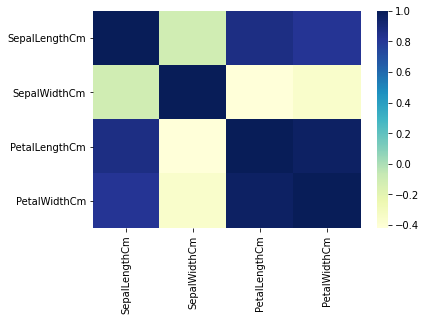

In [0]:
sns.heatmap(data.corr(),cmap='YlGnBu')
#SepalLength highly correlates with PetalLength and PetalWidth but negetively correlates with SepalWidth

Data Visualization

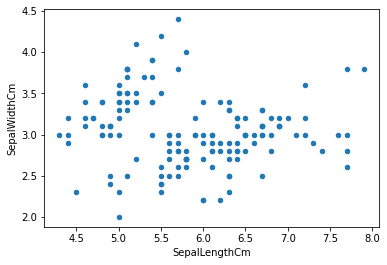

In [0]:
data.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')
#Noticed that we can cluster the groups

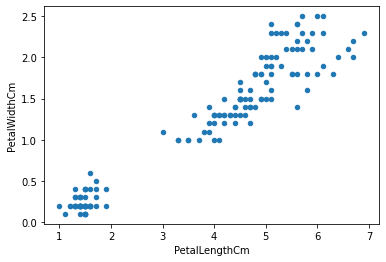

In [0]:
data.plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm')
#here the features are highly correlated

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


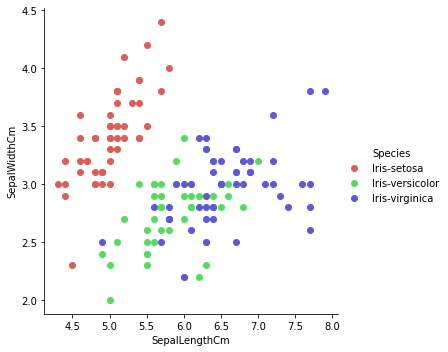

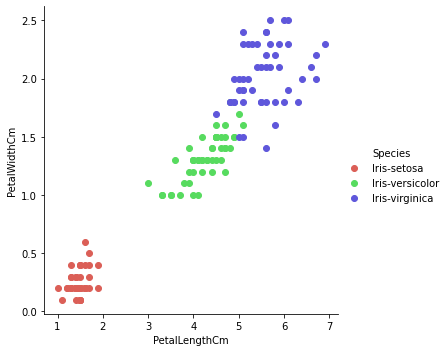

In [0]:
sns.FacetGrid(data, hue="Species", palette="hls", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

sns.FacetGrid(data, hue="Species", palette="hls", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd297863748>,
      dtype=object)

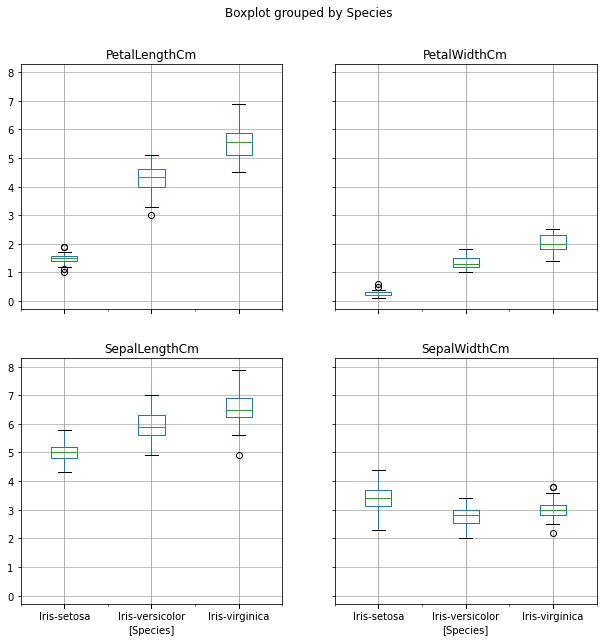

In [0]:
#checking for outiers
data.boxplot(by='Species',figsize=(10,10))
#here via boxplot we can say we can easily differenciate with petal width length easily whereas
#with the petal length and with overlaps occurs frequently

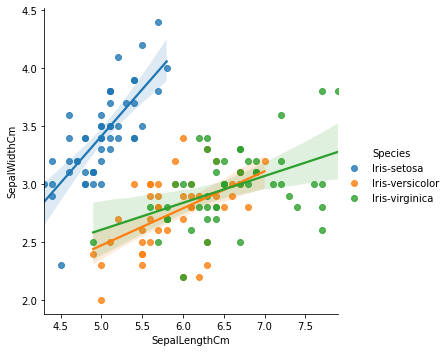

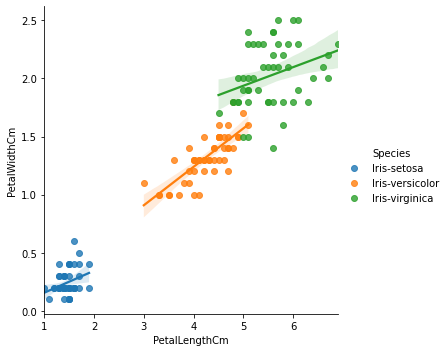

In [0]:
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',data=data,hue='Species')
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm',data=data,hue='Species')
#plotted regression line for each species and differenciated with hues

Prediction Models

In [0]:
#spliting the data into test and train 
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(data, test_size = 0.3)
#the data is being split into test and train
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [0]:
x_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# taking the training data features
y_train= train.Species
# output of our training data
x_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
# taking test data features
y_test  =test.Species  
 #output value of test data

In [0]:
print(x_train.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
103            6.3           2.9            5.6           1.8
25             5.0           3.0            1.6           0.2
75             6.6           3.0            4.4           1.4
12             4.8           3.0            1.4           0.1
9              4.9           3.1            1.5           0.1


In [0]:
print(y_train.head())

103     Iris-virginica
25         Iris-setosa
75     Iris-versicolor
12         Iris-setosa
9          Iris-setosa
Name: Species, dtype: object


K-NN

In [0]:
#measures of accuracy
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix,roc_auc_score

In [0]:
def all_score(model):
  predict=model.predict(x_test)
  print("testing accuracy:",accuracy_score(y_test,predict))
  print("training accuracy:",accuracy_score(y_train,model.predict(x_train)))
  print(confusion_matrix(y_test,predict))
  print("Classification report:\n",classification_report(y_test,predict))

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
all_score(model)

testing accuracy: 0.9777777777777777
training accuracy: 0.9714285714285714
[[ 9  0  0]
 [ 0 19  1]
 [ 0  0 16]]
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
all_score(rfc)

testing accuracy: 0.9777777777777777
training accuracy: 1.0
[[ 9  0  0]
 [ 0 20  0]
 [ 0  1 15]]
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.95      1.00      0.98        20
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [0]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
all_score(model)

testing accuracy: 0.9777777777777777
training accuracy: 1.0
[[ 9  0  0]
 [ 0 20  0]
 [ 0  1 15]]
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.95      1.00      0.98        20
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [0]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
all_score(model)

testing accuracy: 0.9777777777777777
training accuracy: 0.9714285714285714
[[ 9  0  0]
 [ 0 19  1]
 [ 0  0 16]]
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [0]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)
all_score(model)

testing accuracy: 1.0
training accuracy: 0.9619047619047619
[[ 9  0  0]
 [ 0 20  0]
 [ 0  0 16]]
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
